In [1]:
import pandas as pd
import numpy as np

In [80]:
file = "c:/git/HomeProject/csvs/amazon.csv"

# Create DataFrame object
df = pd.read_csv(file, encoding="latin1")

In [3]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [36]:
df.groupby('date').count()
# It seems like the 'date' columns is not so useful.. 
# We should combine year and month columns to create a monthly sum of number of fires per state

,year,state,month,number
date,,,,
1998-01-01,324,324,324,324
1999-01-01,324,324,324,324
2000-01-01,324,324,324,324
2001-01-01,324,324,324,324
2002-01-01,324,324,324,324
2003-01-01,324,324,324,324
2004-01-01,324,324,324,324
2005-01-01,324,324,324,324
2006-01-01,324,324,324,324


In [37]:
df['Datetime'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))
# It won't work, because we have portuguese values in month column..

ValueError: Unable to parse string "Janeiro" at position 0

In [47]:
def convert_months(month):
    """
    1. Step: Translate month data from Portuguese to English.
    2. Step: Create integer object from input data.
    3. Step: return date object.
    """
    if str(month)[:3] == 'Jan':
        new_month = 1
    elif str(month)[:3] == 'Fev':
        new_month = 2
    elif str(month)[:3] == 'Mar':
        new_month = 3
    elif str(month)[:3] == 'Abr':
        new_month = 4
    elif str(month)[:3] == 'Mai':
        new_month = 5
    elif str(month)[:3] == 'Jun':
        new_month = 6
    elif str(month)[:3] == 'Jul':
        new_month = 7
    elif str(month)[:3] == 'Ago':
        new_month = 8
    elif str(month)[:3] == 'Set':
        new_month = 9
    elif str(month)[:3] == 'Out':
        new_month = 10
    elif str(month)[:3] == 'Nov':
        new_month = 11
    elif str(month)[:3] == 'Dez':
        new_month = 12
    else:
        return print("Not convertable month data!")
    return new_month

In [48]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [81]:
month_list_en = []
month_list_pt = list(df.month)
for mon in month_list_pt:
    month_list_en.append(convert_months(mon))
df['months'] = month_list_en

In [82]:
df.head()
# Now, we have a column with integer values representing months.

,year,state,month,number,date,months
0,1998,Acre,Janeiro,0.0,1998-01-01,1
1,1999,Acre,Janeiro,0.0,1999-01-01,1
2,2000,Acre,Janeiro,0.0,2000-01-01,1
3,2001,Acre,Janeiro,0.0,2001-01-01,1
4,2002,Acre,Janeiro,0.0,2002-01-01,1


In [83]:
df.months.describe()

count    6454.000000
mean        6.476139
std         3.441522
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: months, dtype: float64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 6 columns):
year      6454 non-null int64
state     6454 non-null object
month     6454 non-null object
number    6454 non-null float64
date      6454 non-null object
months    6454 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 302.7+ KB


In [85]:
df['date'] = pd.to_datetime(df.year.astype(str) + '-' + df.months.astype(str))

In [86]:
df[df.months != 1].head()

,year,state,month,number,date,months
20,1998,Acre,Fevereiro,0.0,1998-02-01,2
21,1999,Acre,Fevereiro,0.0,1999-02-01,2
22,2000,Acre,Fevereiro,0.0,2000-02-01,2
23,2001,Acre,Fevereiro,0.0,2001-02-01,2
24,2002,Acre,Fevereiro,1.0,2002-02-01,2


In [ ]:
#Let's group by on the new date column

In [92]:
df.groupby('date').count()

,year,state,month,number,months
date,,,,,
1998-01-01,27,27,27,27,27
1998-02-01,27,27,27,27,27
1998-03-01,27,27,27,27,27
1998-04-01,27,27,27,27,27
1998-05-01,27,27,27,27,27
...,...,...,...,...,...
2017-07-01,27,27,27,27,27
2017-08-01,27,27,27,27,27
2017-09-01,27,27,27,27,27


In [93]:
df.set_index('date', inplace=True)

In [94]:
df.head()

,year,state,month,number,months
date,,,,,
1998-01-01,1998,Acre,Janeiro,0.0,1
1999-01-01,1999,Acre,Janeiro,0.0,1
2000-01-01,2000,Acre,Janeiro,0.0,1
2001-01-01,2001,Acre,Janeiro,0.0,1
2002-01-01,2002,Acre,Janeiro,0.0,1


In [95]:
df2 = df.loc[:,['state','number']]

In [96]:
df2.head()

,state,number
date,,
1998-01-01,Acre,0.0
1999-01-01,Acre,0.0
2000-01-01,Acre,0.0
2001-01-01,Acre,0.0
2002-01-01,Acre,0.0


In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6454 entries, 1998-01-01 to 2016-12-01
Data columns (total 2 columns):
state     6454 non-null object
number    6454 non-null float64
dtypes: float64(1), object(1)
memory usage: 311.3+ KB


Now we have a new dataframe which has a DateTimeIndex, a state columns and a number column. Let's see what we get if we make some aggregations on the data...

In [104]:
df_sum_per_date = df2['number'].resample('M').mean()
df_sum_per_date

date
1998-01-31      0.000000
1998-02-28      0.000000
1998-03-31      0.000000
1998-04-30      0.000000
1998-05-31      0.000000
                 ...    
2017-07-31    219.629556
2017-08-31    152.607778
2017-09-30    102.937667
2017-10-31    133.339222
2017-11-30    230.273296
Freq: M, Name: number, Length: 239, dtype: float64

In [106]:
import matplotlib.pyplot as plt

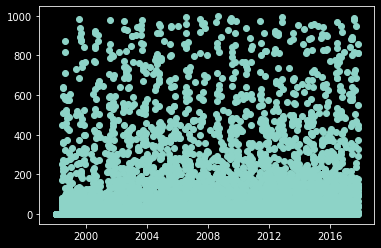

In [112]:
plt.scatter(df.index, df.number)

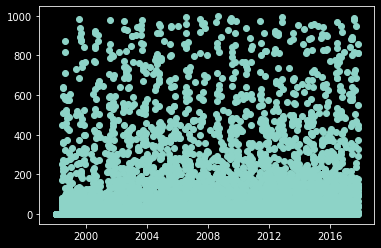

In [113]:
plt.scatter(df2.index, df2.number)